In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import pyart
import warnings
warnings.filterwarnings('ignore')

In [8]:
radar = pyart.io.read('/home/PDTC/PDTCHACPL/MCRKalapureddy/Hamid/data/20150805/MDV-20150805-084449-PPIVol.nc')

In [9]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	standard_name: altitude
	units: meters
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (9270,)>
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float32 and shape: (9270,)>
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	units: degrees
	axis: radial_elevation_coordinate
fields:
	DBZH:
		data: <ndarray of type: float32 and shape: (9270, 2500)>
		long_name: equivalent_reflectivity_factor_h
		units: dBZ
		_FillValue: -32768
		coordinates: elevation azimuth range
	DBZV:
		data: <ndarray of type: float32 and shape: (9270, 2500)>
		long_name: equivalent_reflectivity_factor_v
		units: dBZ
		_FillValue: -32768
		coordinates: elevation azimuth range
	VELH:
		data: <ndarray of type: float32 and shape: (9270, 2500)>
		long_name: radial_ve

In [3]:
dir(radar)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_sweep_in_range',
 '_dic_info',
 'add_field',
 'add_field_like',
 'altitude',
 'altitude_agl',
 'antenna_transition',
 'azimuth',
 'check_field_exists',
 'drift',
 'elevation',
 'extract_sweeps',
 'fields',
 'fixed_angle',
 'gate_altitude',
 'gate_latitude',
 'gate_longitude',
 'gate_x',
 'gate_y',
 'gate_z',
 'georefs_applied',
 'get_azimuth',
 'get_elevation',
 'get_end',
 'get_field',
 'get_gate_area',
 'get_gate_lat_lon_alt',
 'get_gate_x_y_z',
 'get_nyquist_vel',
 'get_slice',
 'get_start',
 'get_start_end',
 'heading',
 'info',
 'init_gate_altitude',
 'init_gate_longitude_lat

In [10]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV'])

In [11]:
display = pyart.graph.RadarDisplay(radar)

In [12]:
radar.longitude['data']

masked_array(data=[73.86896515],
             mask=False,
       fill_value=1e+20)

display?

display.plot?

display.plot_ppi?

In [20]:
%matplotlib notebook

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contourf3D(ds.x/1000,ds.y/1000,ds.DBZH[0,4])
ax.plot(ds.x,ds.y,ds.z)
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('DBZH', 4, cmap='jet',colorbar_flag=True)
ax.add_patch(mpatches.Rectangle(xy=[73.856, 18.520], width=.3, height=.3,
                                    facecolor='None',edgecolor='r',linewidth=2,
                                    alpha=0.7,label='Pune'))
plt.legend()
display.plot('DBZH', sweep=1, vmin=-10, vmax=60)

<IPython.core.display.Javascript object>

NameError: name 'ds' is not defined

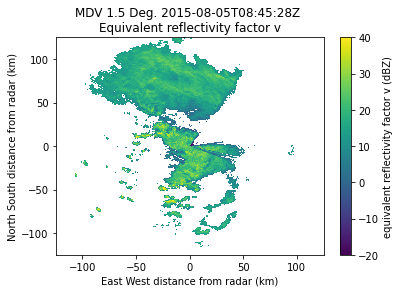

In [14]:
display.plot('DBZV', sweep=1, vmin=-20, vmax=40)

projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])



fig = plt.figure(figsize=(6,6))
display.plot_ppi('DBZH', 1, vmin=-20, vmax=20,
                     projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])